In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# abalone 데이터 CSV 파일 경로 설정
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv"
df = pd.read_csv(url, index_col='id')

# 데이터프레임 확인
display(df.head())
print("컬럼 목록:", df.columns)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


컬럼 목록: Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


In [3]:
# 결측치 확인
print(df.isnull().sum(),"\n")

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64 



In [5]:
# 레이블의 데이터 비율을 확인(imbalanced data인지 확인)
print(df['Rings'].value_counts(),"\n")

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
29      1
26      1
2       1
25      1
Name: count, dtype: int64 



# 원-핫 인코딩

In [13]:
y = df['Rings']   # 레이블(Label) 데이터
Y = pd.get_dummies(y).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# X를 숫자로 변환 및 Numpy 변환

In [16]:
'''
df_encoded = pd.get_dummies(df, columns=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety'])
'''
# 컬럼 값들이 문자열인 경우, 숫자로 바꿔줘야 함. 원-핫 인코딩 또는 Label Encoder
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()  # 원본 데이터 유지
for col in ['Sex']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop(columns=['Rings']).values.astype(np.float32)
X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]],
      dtype=float32)

# Data split & shape 확인

In [17]:
# x/y데이터. train/test 데이터 분리 (학습 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# shape 출력(인스턴스의 개수, 특성의 개수)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3341, 8), (3341, 28), (836, 8), (836, 28))

# Sequential 모델 생성

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='relu')) # input_shape 숫자를 컬럼의 개수와 맞추지 않으면 오류 발생
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693 (2.71 KB)

 Trainable params: 693 (2.71 KB)

 Non-trainable params: 0 (0.00 B)

# 모델에 fit

In [22]:
N_EPOCHS = 30

# validation data에 Y_test를 넣어서 train하면 안됨
model_history=model.fit(x=X_train, y=Y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.1)
Y_pred = model.predict(X_test)

# one-hot encoding 데이터를 정수 라벨로 변환
Y_test_class = np.argmax(Y_test, axis=1)
Y_pred_class = np.argmax(Y_pred, axis=1)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - mse: 

# loss 체크

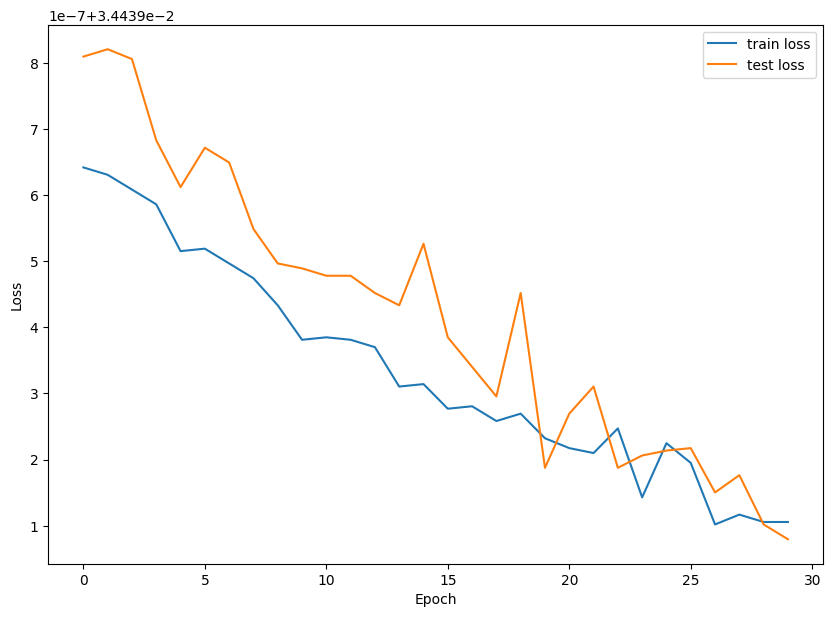

In [23]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), model_history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 평가

In [24]:
model.evaluate(X_test, Y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344 


[0.034439146518707275, 0.034439146518707275]